<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Time Series Analysis</h1>
        <h1>Data Exploration</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import watermark

%matplotlib inline
%load_ext watermark

List out the versions of all loaded libraries

In [2]:
%watermark -n -v -m -g -iv

json      2.0.9
autopep8  1.5
pandas    1.0.1
watermark 2.0.2
numpy     1.18.1
Sat Feb 29 2020 

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : e9953424c2f06ff0260f07f5a62a740e57c70a5b


Set the default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')

## GDP

The first timeseries will consider is the US Quarterly GDP for the past 70 years.

In [4]:
GDP = pd.read_csv('data/GDP.csv', parse_dates=['DATE'])

We set the DATE column to be the index

In [5]:
GDP.set_index('DATE', inplace=True)

In [6]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1947-01-01 to 2019-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     290 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB


And now we can easily plot the timeseries

Text(0, 0.5, 'GDP ($\\$B$)')

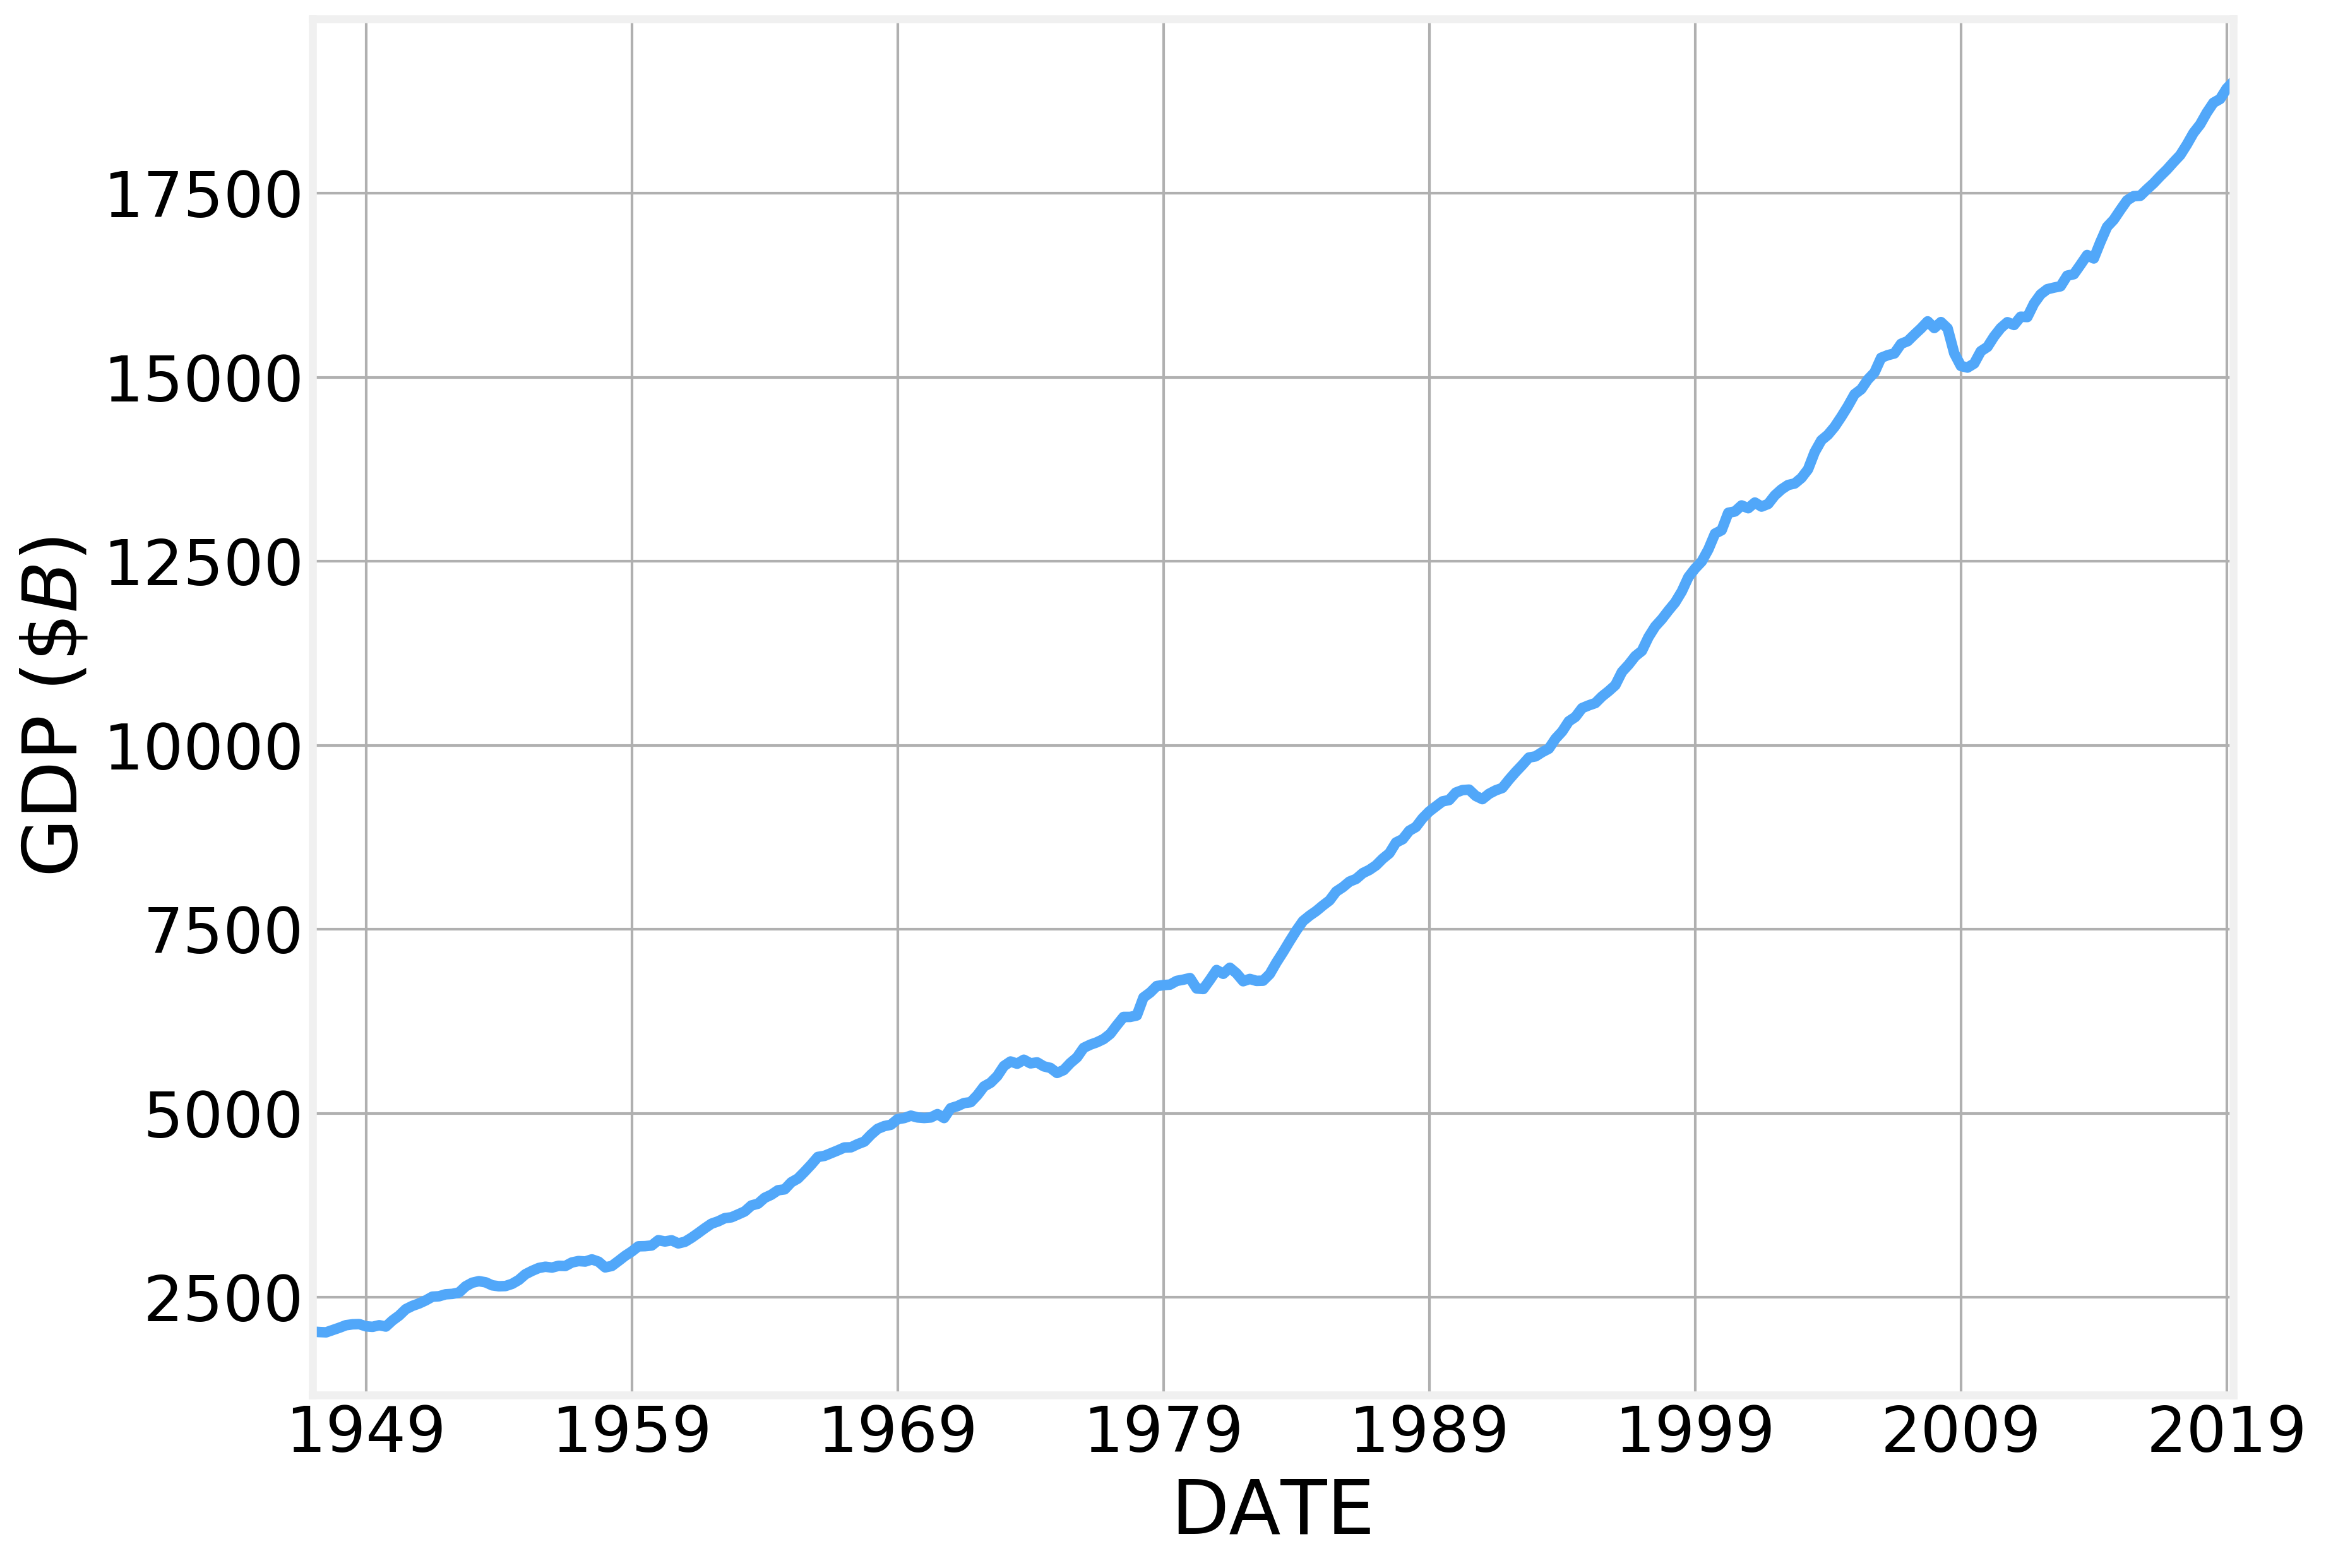

In [7]:
ax = GDP.plot(legend=False)
ax.set_ylabel(r'GDP ($\$B$)')

It displays a clear upward trend

## Influenza mortality

Next, we look the percentage of deaths attributed to Influenza and Pneumonia in the past 8 years

In [8]:
ILI = pd.read_csv('data/CDC.csv')

In [9]:
ILI.head()

,Year,Week,Percent of Deaths Due to Pneumonia and Influenza,Expected,Threshold,All Deaths,Pneumonia Deaths,Influenza Deaths
0,2012,1,8.479120,8.15718,8.49104,51102,4323,10
1,2012,2,8.343472,8.22181,8.55556,50962,4245,7
2,2012,3,8.370908,8.27534,8.60898,51010,4261,9
3,2012,4,8.448458,8.31696,8.65049,50163,4227,11
4,2012,5,8.140332,8.34602,8.67945,49568,4026,9


Unfortunately, this dataset doesn't have a date column that we can easily use as an index. We can still plot it, but the x-axis will be meaningless

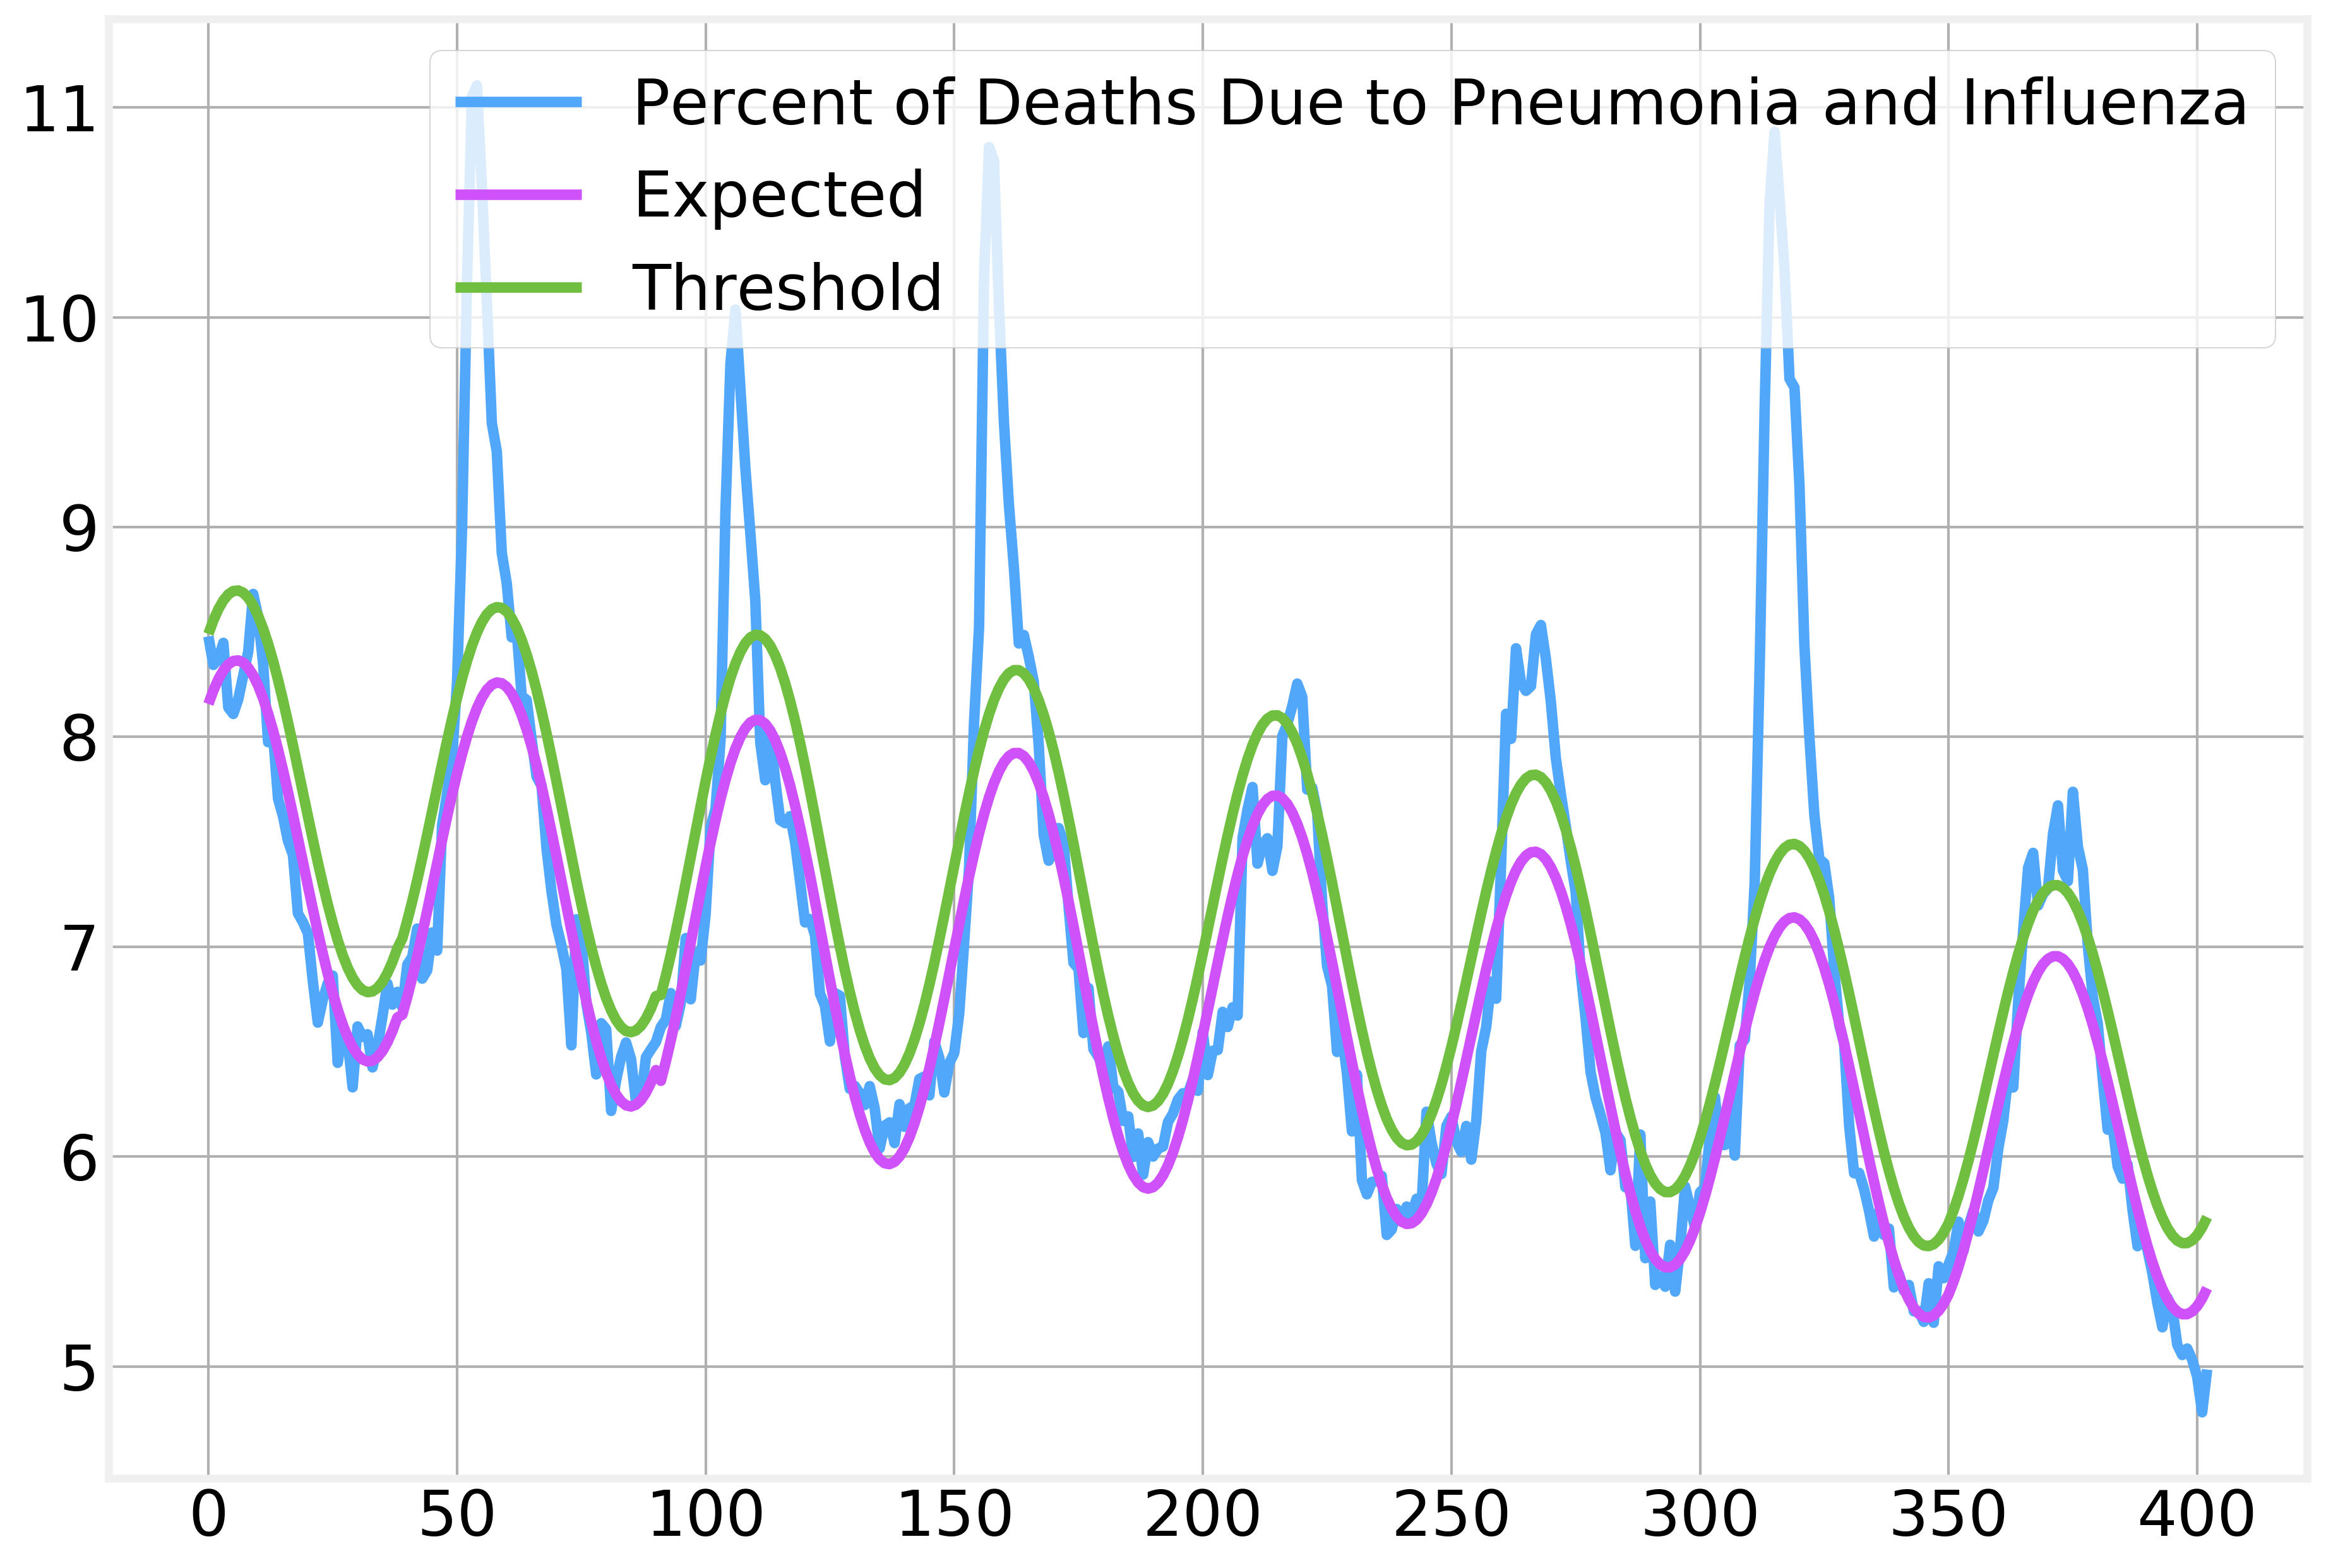

In [10]:
ILI[['Percent of Deaths Due to Pneumonia and Influenza', 'Expected', 'Threshold']].plot()

### Exercise
Can you generate a fake date column that we can use as an index?

In [28]:
# %load solutions/ILI_plot.py

The seasonal behavior in unmistakable. The purple curve illustrates the expected seasonal behavior, while the green curve displays the threshold above which we are facing an epidemic

## Sun activity

The number of observed sun spots over 300 years also display a nice seasonal behavior over the course of a decade or so

In [12]:
Sun = pd.read_csv('data/sun.csv')

Text(0.5, 0, 'Year')

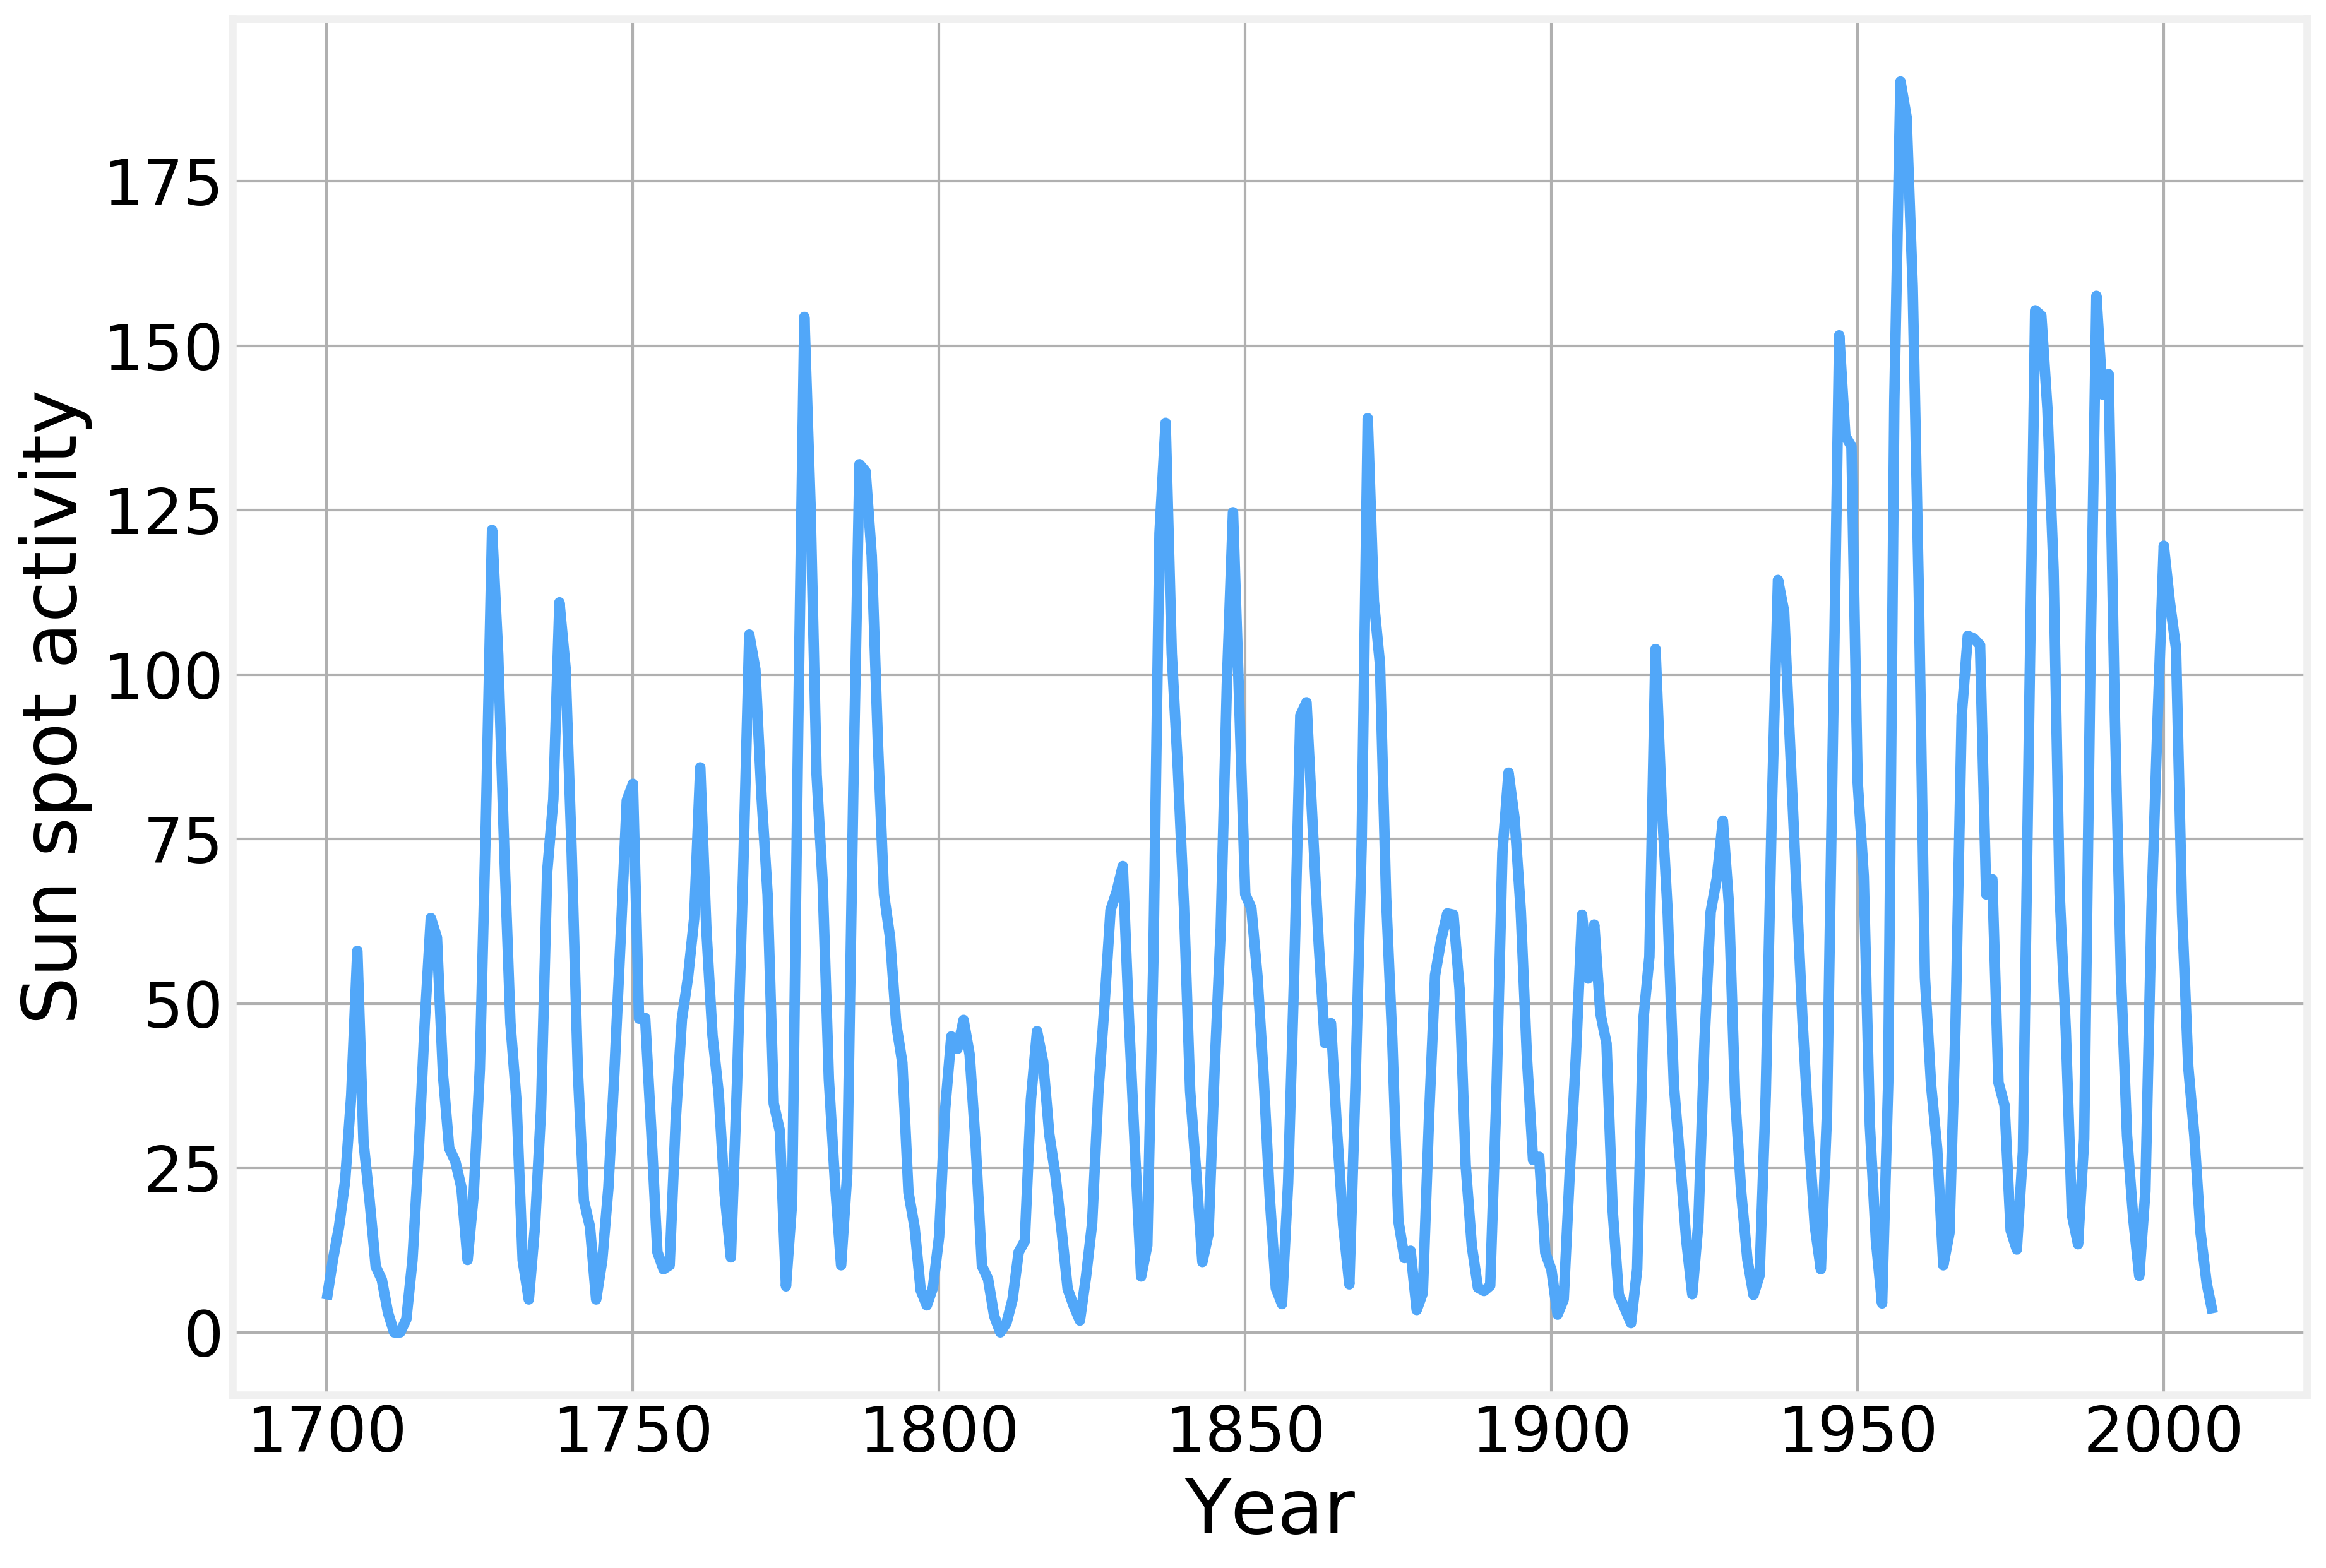

In [13]:
ax = Sun.plot(x='YEAR', y='SUNACTIVITY', legend=False)
ax.set_ylabel('Sun spot activity')
ax.set_xlabel('Year')

## Dow-Jones Industrial Average

The Dow-Jones Industrial Average also has a clear uptrend like GDP but with significantly larger flucutations

In [14]:
DJIA = pd.read_csv('data/DJIA.csv', parse_dates=['DATE'])

In [15]:
DJIA

,DATE,DJIA
0,2009-10-12,9885.80
1,2009-10-13,9871.06
2,2009-10-14,10015.86
3,2009-10-15,10062.94
4,2009-10-16,9995.91
...,...,...
2604,2019-10-04,26573.72
2605,2019-10-07,26478.02
2606,2019-10-08,26164.04
2607,2019-10-09,26346.01


In [16]:
DJIA.set_index('DATE', inplace=True)

Everything seems fine, but when we try to plot it, there's an error:

In [17]:
# ax = DJIA.plot(legend=False)
# ax.set_ylabel('DJIA')
# ax.set_xlabel('Date')

In [18]:
DJIA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2609 entries, 2009-10-12 to 2019-10-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DJIA    2609 non-null   object
dtypes: object(1)
memory usage: 40.8+ KB


### Exercise

Fix the data loading so that we can plot the timeseries

In [19]:
# %load solutions/djia_plot.py

## Airline Passengers

The number of passenters in international flights in the 50s displays both a trend and a seasonal pattern

### Exercise
Load and plot the time series

In [26]:
# %load solutions/airline_plot.py

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>